# Sieci neuronowe z wykorzystaniem Kerasa (1)
## Głębokie uczenie

# 1. Podstawy


**Zanim przejdziemy do bardziej zaawansowanego przykładu, zapoznamy się z Tensorflow i Keras. Przyjrzymy się pierwszemu konkretnemu przykładowi sieci neuronowej, która wykorzystuje bibliotekę Python Keras do nauki klasyfikacji odręcznie pisanych cyfr.**

Problemem, który staramy się rozwiązać, jest klasyfikacja obrazów pogrubiony tekstodręcznych cyfr w skali szarości (28 pikseli na 28 pikseli) do 10 kategorii (od 0 do 9). Zbiór danych, którego użyjemy to MNIST. Jest to zestaw 60 000 obrazów treningowych plus 10 000 obrazów testowych, zebranych przez National Institute of Standards and Technology (NIST w MNIST) w latach 80-tych.

Możesz myśleć o "rozwiązywaniu" MNIST jako o "Hello World" głębokiego uczenia się - to jest to, co robisz, aby sprawdzić, czy twoje algorytmy działają zgodnie z oczekiwaniami.

Po pierwsze, zaimportujemy Keras (w oparciu o wersję Python/Tensorflow):

In [ ]:
from tensorflow import keras
...
import keras

Jeśli korzystasz z najnowszej wersji Tensorflow (keras jest już dołączony), dodaj dodatkową funkcjonalność za pomocą:

```
from tensorflow import keras
from tensorflow.keras import XXX
```

Zbiór danych MNIST jest wstępnie załadowany do Keras w postaci zestawu czterech tablic Numpy:

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Zadanie 1**

*   Sprawdź liczbę przykładów treningowych i testowych.
*   Ile mamy etykiet?
*   Sprawdź rozmiar obrazu i wykreśl kilka przykładów


train_images:  (60000, 28, 28)
test_images:  (10000, 28, 28)
-------------------------------------
train_labels:  (60000,)
test_labels:  (10000,)
-------------------------------------
rozmiar obrazu (28, 28)
-------------------------------------
przyklad: 


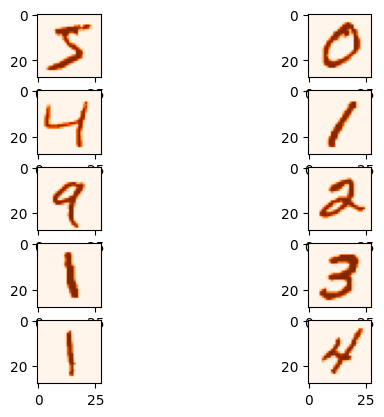

In [ ]:
#TODO
print("train_images: ", str(train_images.shape))
print("test_images: ", str(test_images.shape))
print("-------------------------------------")
print("train_labels: ", str(train_labels.shape))
print("test_labels: ", str(test_labels.shape))

print("-------------------------------------")
#rozmiar obrazu
print("rozmiar obrazu", train_images[0].shape)

print("-------------------------------------")
print("przyklad: ")
from matplotlib import pyplot

for i in range(10):
  pyplot.subplot(5,2,i+1)
  pyplot.imshow(train_images[i],cmap=pyplot.get_cmap('Oranges'))
pyplot.show()

**Przepływ pracy DNN**
1. Tworzenie architektury sieci neuronowej.
2. Trenuj naszą sieć neuronową za pomocą danych treningowych, train_images i train_labels. Następnie sieć nauczy się kojarzyć obrazy i etykiety.
3. Sieć wygeneruje prognozy dla test_images i sprawdzimy, czy te prognozy są zgodne z etykietami z test_labels.

**Architektura DNN**
1. Nasza sieć będzie składać się z sekwencji dwóch warstw `Dense`, które są gęsto połączonymi (zwanymi również "w pełni połączonymi") warstwami neuronowymi.
2. Druga (i ostatnia) warstwa to 10-kierunkowa warstwa "softmax", co oznacza, że zwróci ona tablicę 10 wyników prawdopodobieństwa (sumujących się do 1). Każdy wynik będzie prawdopodobieństwem, że bieżący obraz cyfry należy do jednej z naszych 10 klas cyfr.

Trening DNN
Aby nasza sieć była gotowa do treningu, musimy wybrać jeszcze trzy elementy w ramach etapu "kompilacji":
1. **Funkcja straty**: Jest to sposób, w jaki sieć będzie w stanie zmierzyć, jak dobrze radzi sobie z danymi treningowymi, a tym samym, w jaki sposób będzie w stanie iść we właściwym kierunku.
2. **Optymalizator**: jest to mechanizm, za pomocą którego sieć będzie się aktualizować w oparciu o dane, które widzi i funkcję strat.
3. **Metryki**: do monitorowania podczas szkolenia i testowania. Tutaj będziemy dbać tylko o `dokładność` (ułamek obrazów, które zostały poprawnie sklasyfikowane).

Dzisiaj, podczas naszych 3 przykładów, będziemy używać tylko klasy Sequential. Podczas naszych następnych spotkań przedstawię funkcjonalne API, w którym będziemy mogli manipulować tensorami danych przetwarzanymi przez model i stosować warstwy do tych tensorów tak, jakby były funkcjami.


**Architektura sieci**

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

**Trening sieci**

Po zdefiniowaniu architektury modelu proces uczenia można skonfigurować na etapie kompilacji. Określamy: optymalizator, funkcję straty i metryki.

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

**Przygotowanie danych**

Przed treningiem wstępnie przetworzymy nasze dane, przekształcając je w kształt oczekiwany przez sieć i skalując tak, aby wszystkie wartości mieściły się w przedziale [0, 1].

Nasze obrazy treningowe są przechowywane w tablicy o kształcie (60000, 28, 28) typu uint8 z wartościami w przedziale [0, 255].

Przekształć je w tablicę float32 typu shape (60000, 28 * 28) z wartościami od 0 do 1.
Niezbędne funkcje: `reshape` i `astype`.

**Wykonaj to zarówno dla przykładów treningowych, jak i testowych.**

In [ ]:
# TODO
train_images = train_images.reshape((60000, 28*28)).astype('float32')/255

test_images = test_images.reshape((10000, 28*28)).astype('float32')/255


Ponieważ używamy funkcji straty `categorical_crossentropy`, musimy przekonwertować format danych:

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Dopasowanie modelu**

Aby wytrenować naszą sieć, wywołujemy metodę dopasowania sieci z parametrami epochs i batch_size. Ustawmy epochs na 5, a batch_size na 128.

In [ ]:
#TODO: dopasowywanie modelu
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 15ms/step - loss: 0.2635 - accuracy: 0.9246
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1058 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0709 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0507 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0387 - accuracy: 0.9889


**Ocena sieci/Ewaluacja**

Podczas treningu wyświetlane są dwie wielkości: "strata" sieci na danych szkoleniowych oraz dokładność sieci na danych szkoleniowych.
Szybko osiągamy dokładność 0,989 (tj. 98,9%) na danych treningowych.

Teraz sprawdźmy, czy nasz model działa dobrze również na zestawie testowym:

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9773
test_acc: 0.9772999882698059


Dokładność naszego zestawu testowego okazuje się wynosić 97,8% - to znacznie mniej niż dokładność zestawu treningowego.
Ta różnica między dokładnością treningu a dokładnością testu jest przykładem "**nadmiernego dopasowania**", czyli faktu, że modele uczenia maszynowego mają tendencję do osiągania gorszych wyników na nowych danych niż na danych treningowych.
